<a href="https://colab.research.google.com/github/electrodrago/colab-learning/blob/main/3_image_segmantation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image segmantation

Is partition image into many different regions

## Contour

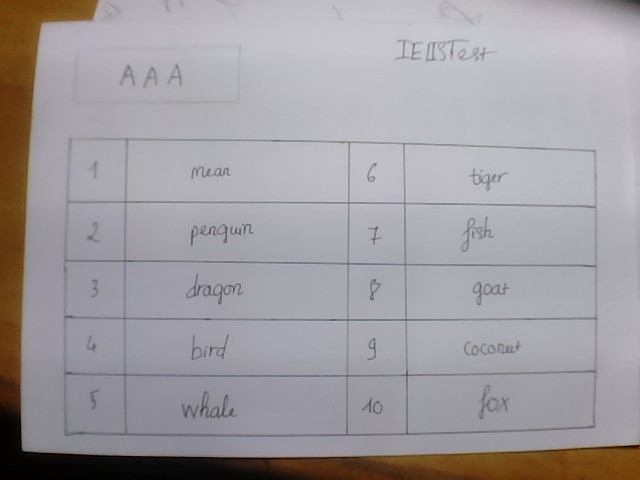

In [24]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/drive/MyDrive/DLCourse/capture.png")
cv2_imshow(image)

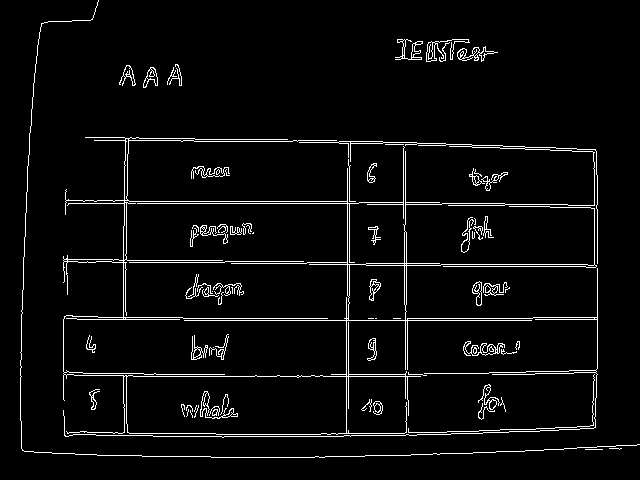

In [25]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray, 50, 200)

cv2_imshow(edged)

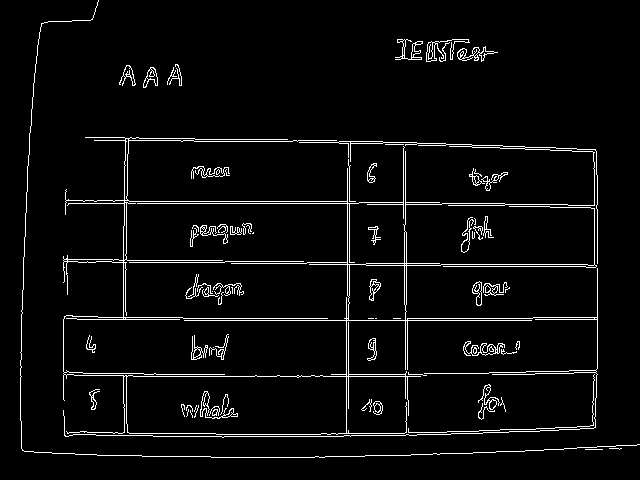

In [27]:
# Find Contours change the image, use edged.copy if dont want
# cv2.CHAIN_APPROX_NONE stores all boundary points
# cv2.CHAIN_APPROX_SIMPLE store only start and end points
# cv2.RETR_EXTERNAL retrieve only external 
# cv2.RETR_LIST retrieve all
# cv2.RETR_COMP retrive 2 level hierachy
# cv2.RETR_TREE retrieve all in full hierachy
contours, hierachy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2_imshow(edged)

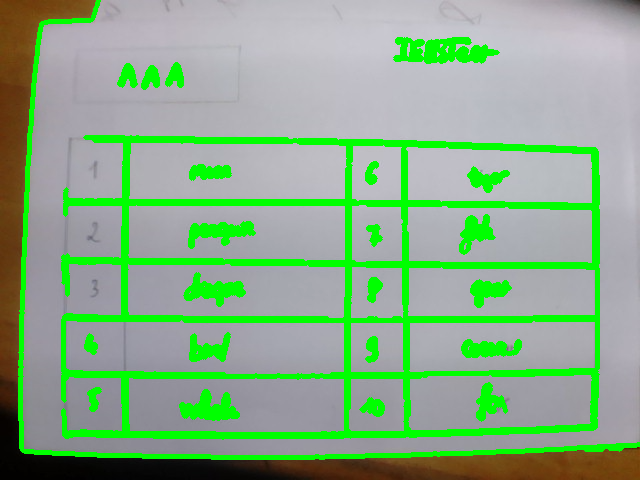

In [28]:
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
cv2_imshow(image)

## Sorting Contours

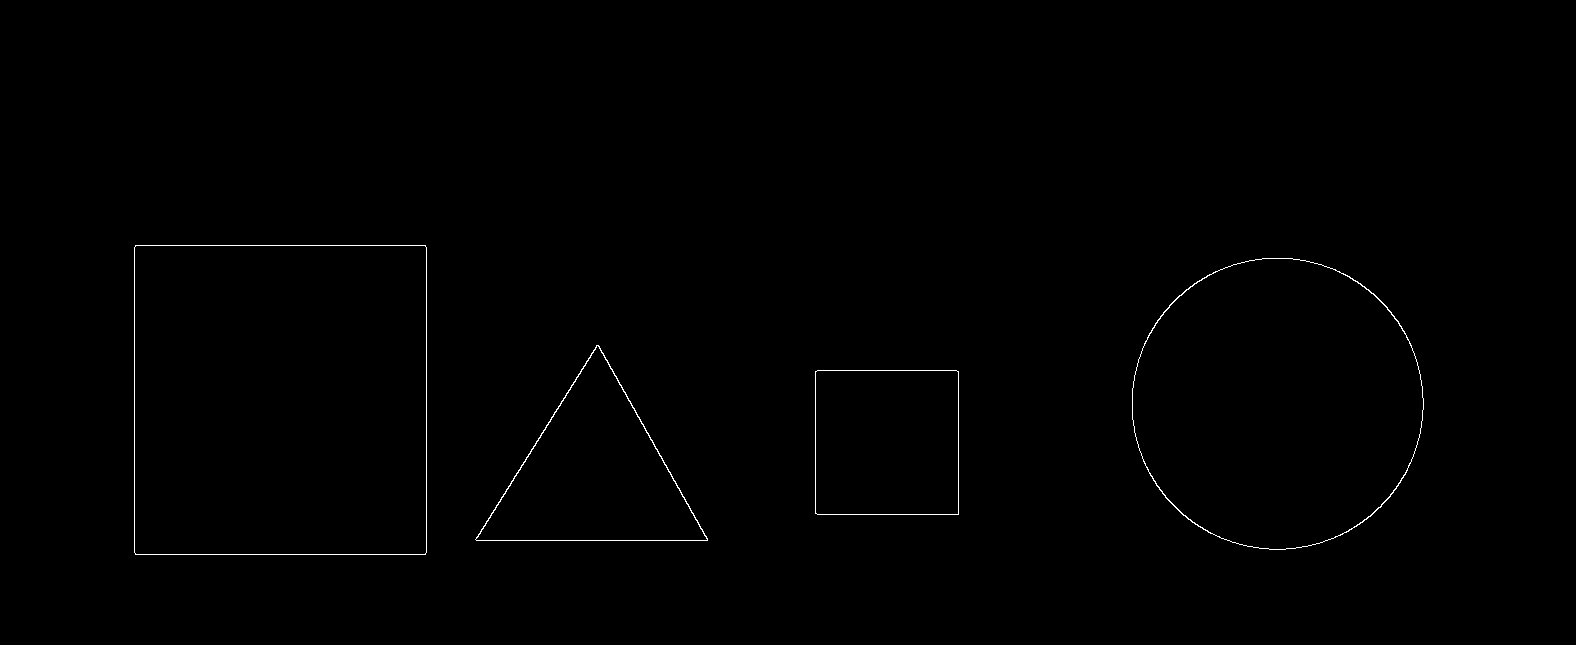

In [29]:
image = cv2.imread('/content/drive/MyDrive/DLCourse/bunchofshapes.jpg')
original_image = image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blank_image = np.zeros((image.shape[0], image.shape[1], 3))

edged = cv2.Canny(gray, 50, 200)
cv2_imshow(edged)

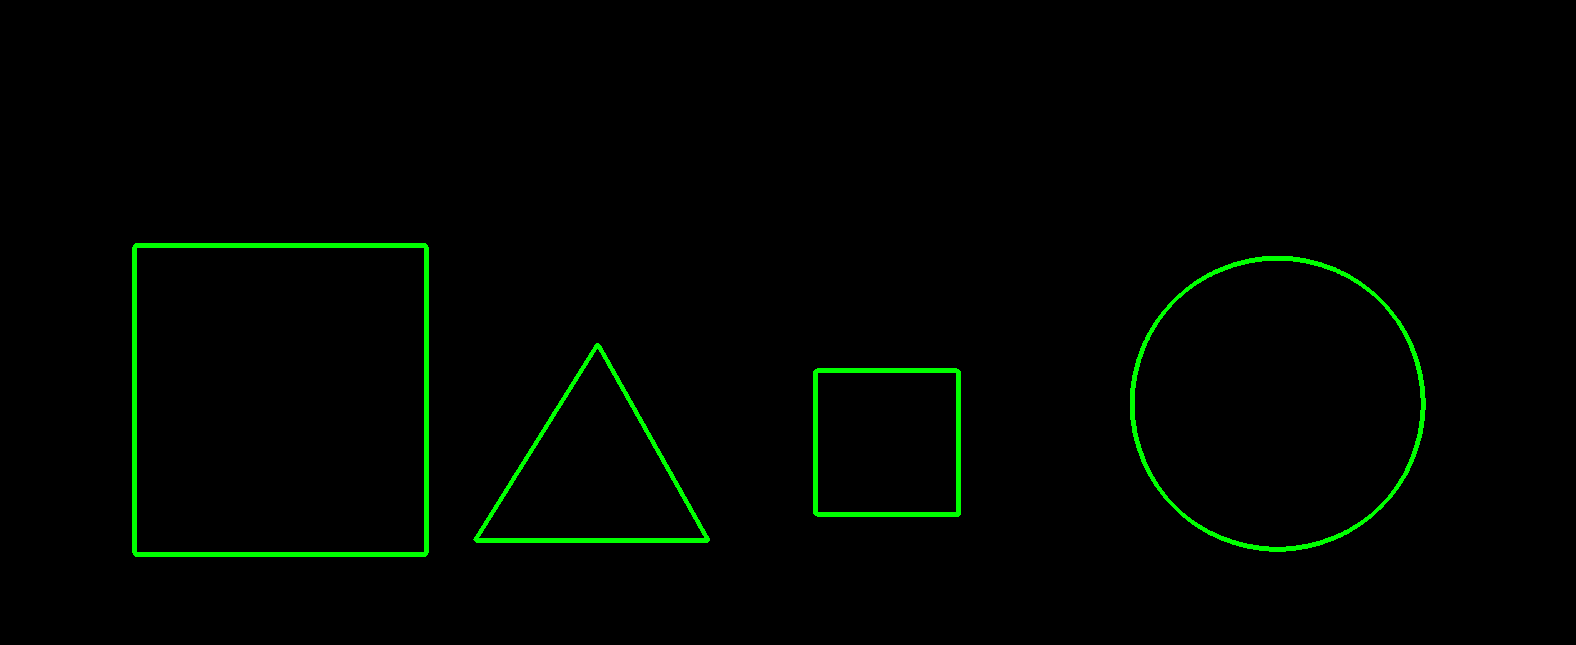

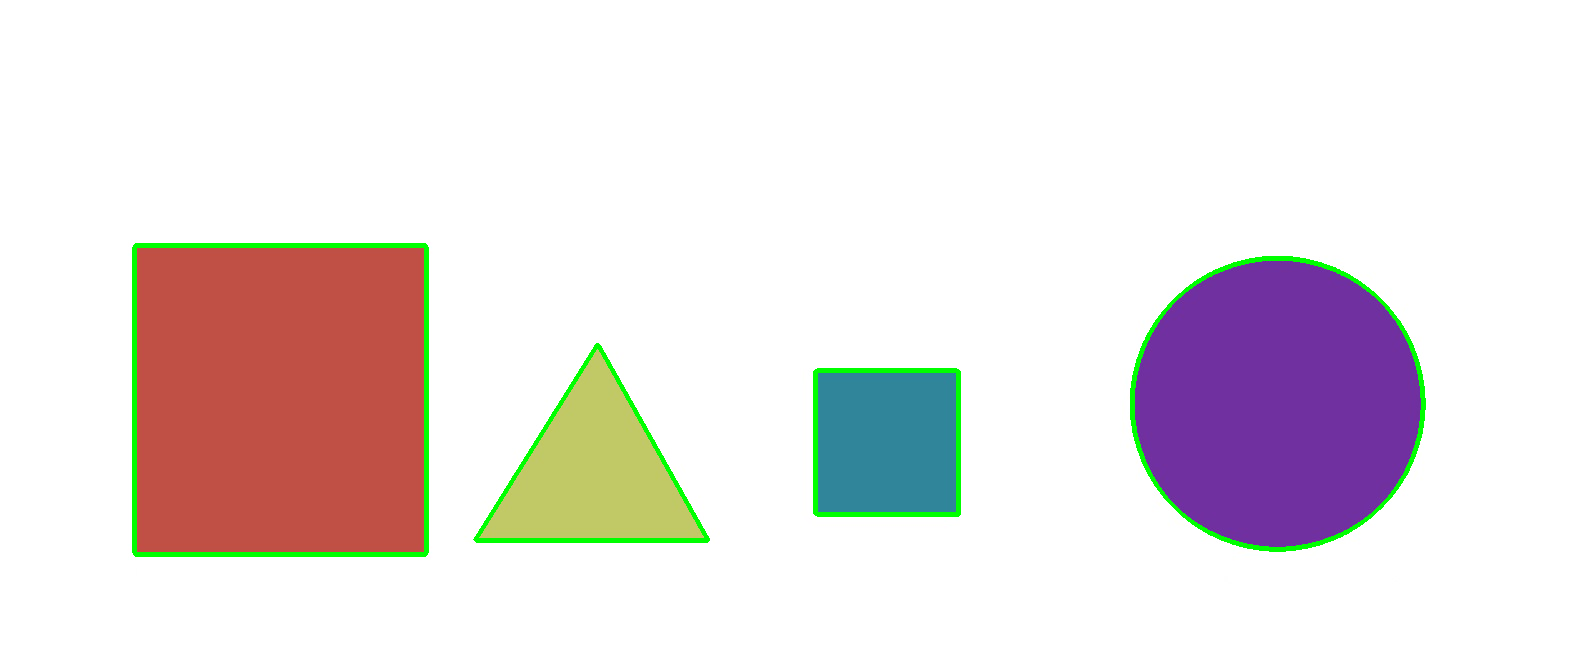

In [ ]:
contours, hierachy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(blank_image, contours, -1, (0, 255, 0), 3)
cv2_imshow(blank_image)

cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
cv2_imshow(image)

In [ ]:
def get_contour_area(contours):
  all_areas = []
  for cnt in contours:
    area = cv2.contourArea(cnt)
    all_areas.append(area)
  return all_areas

print(get_contour_area(contours))
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
print(get_contour_area(sorted_contours))

[20587.5, 22901.5, 66579.5, 90222.0]
[90222.0, 66579.5, 22901.5, 20587.5]


## Approximate Contours

In [30]:
import numpy as np
import cv2

image = cv2.imread('/content/drive/MyDrive/DLCourse/house.jpg')

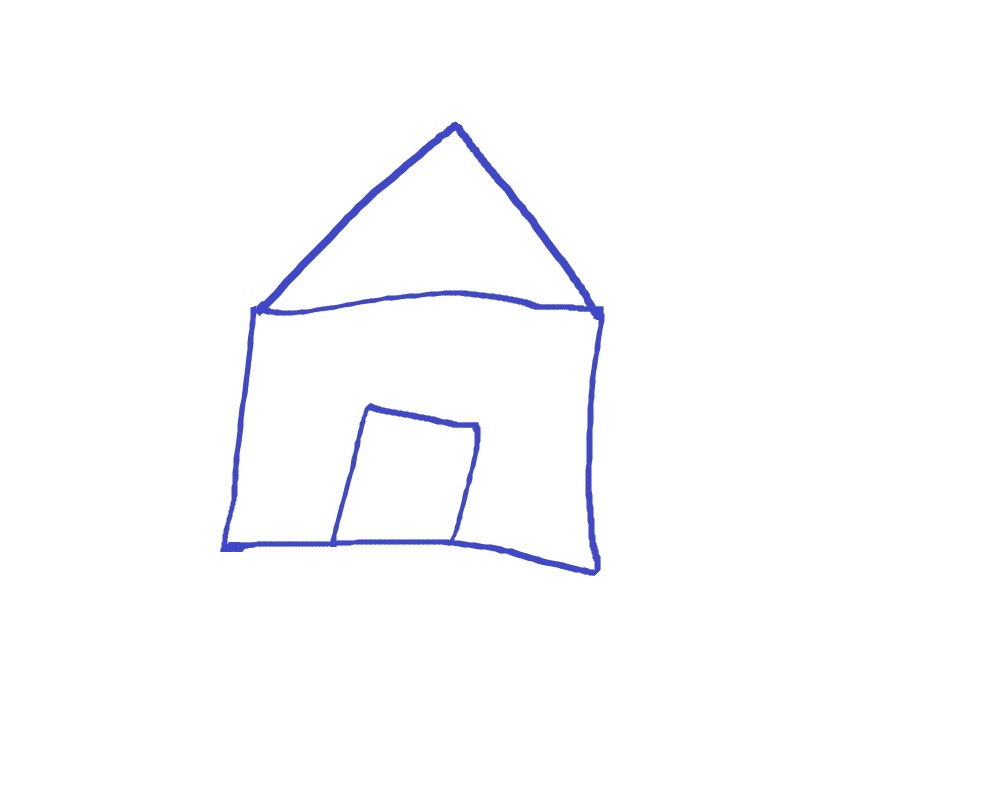

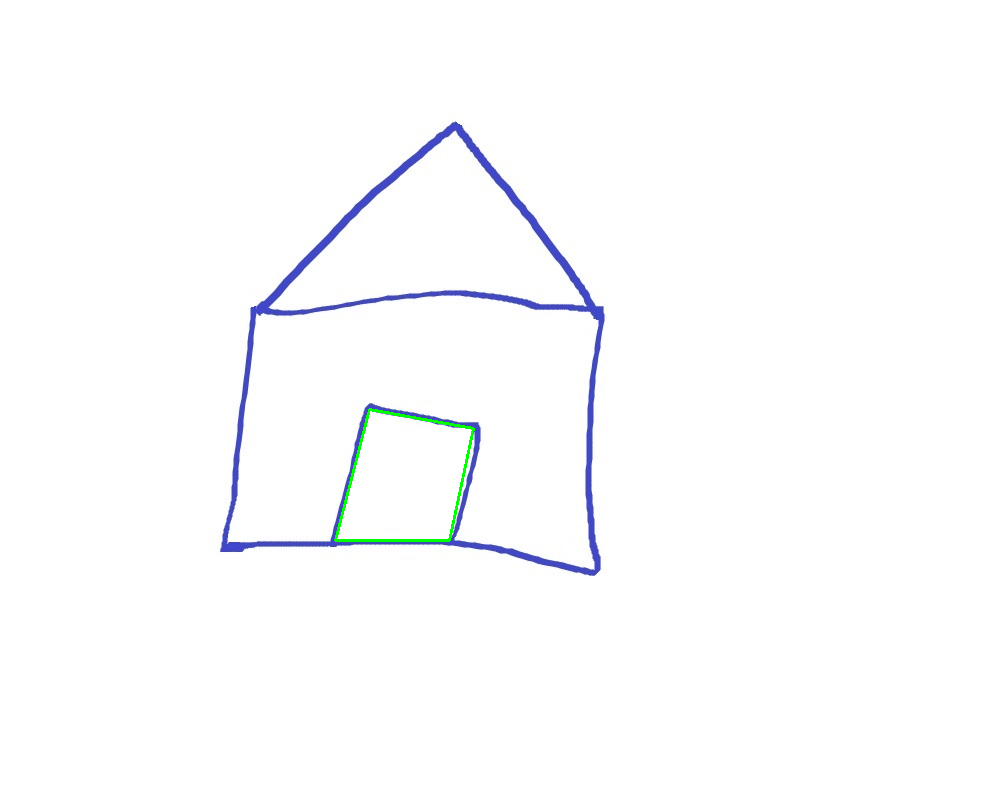

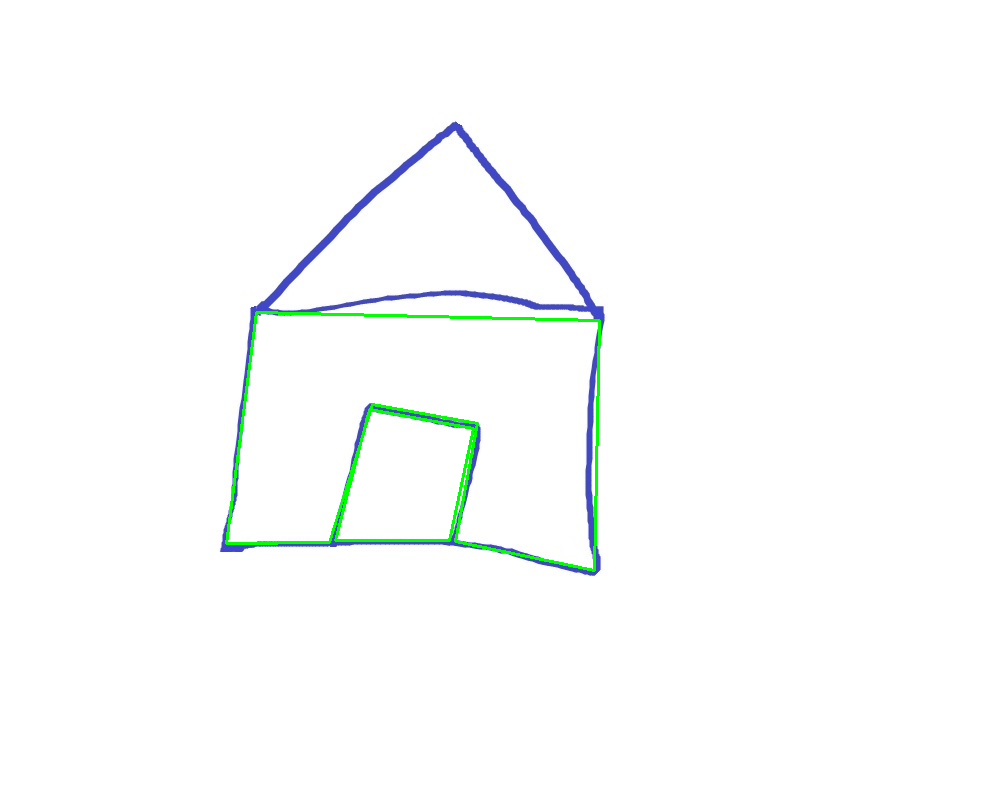

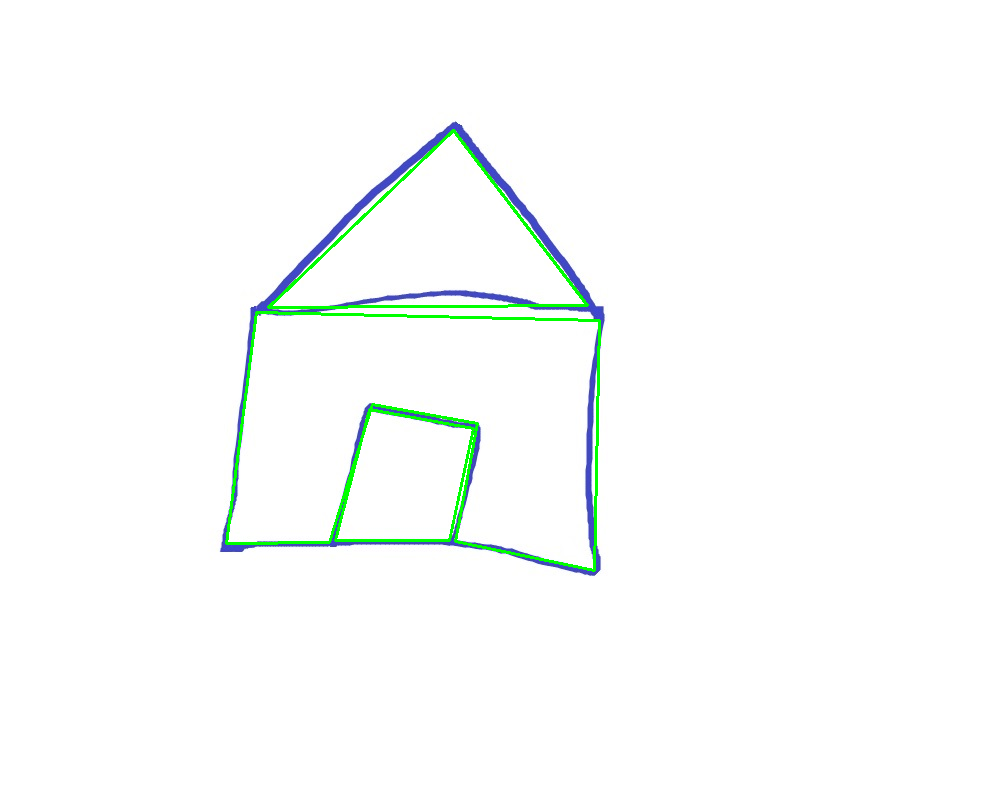

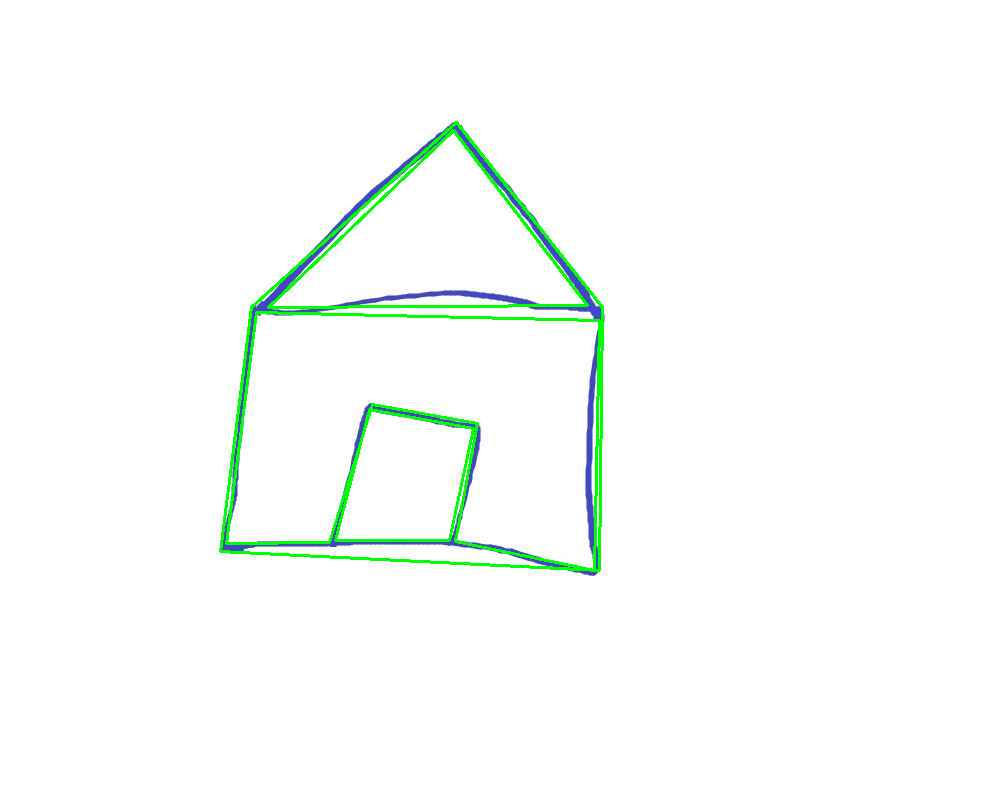

In [32]:
original_image = image.copy()

cv2_imshow(original_image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

contours, hierachy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for c in contours:
  accuracy = 0.03 * cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, accuracy, True)
  cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
  cv2_imshow(image)

## Convex Hull

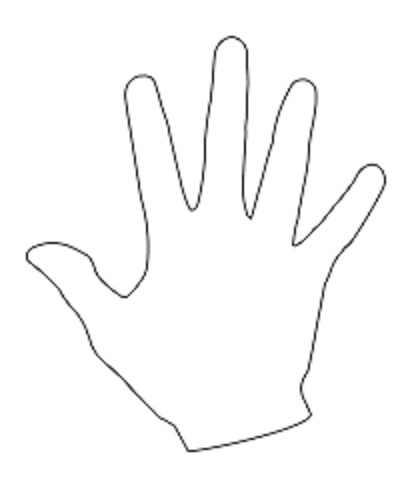

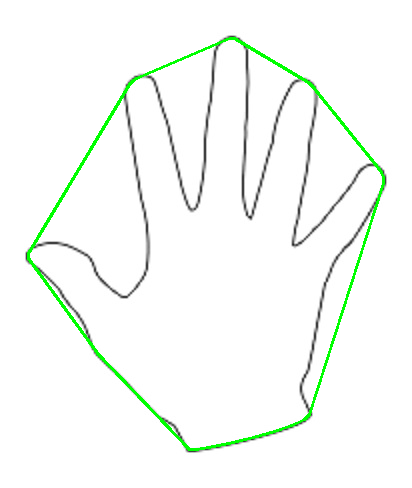

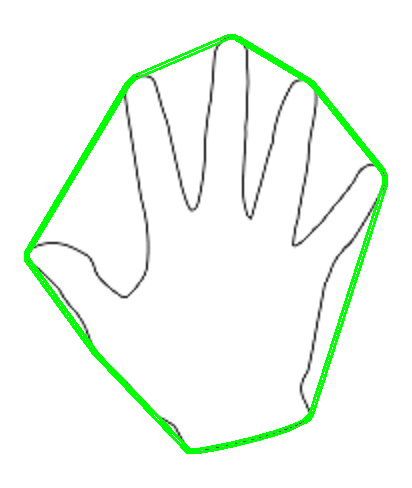

In [34]:
image = cv2.imread('/content/drive/MyDrive/DLCourse/hand.jpg')

original_image = image.copy()

cv2_imshow(original_image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 176, 255, 0)

contours, hierachy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

for c in contours:
  hull = cv2.convexHull(c)
  cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)
  cv2_imshow(image)

## Matching contour shape

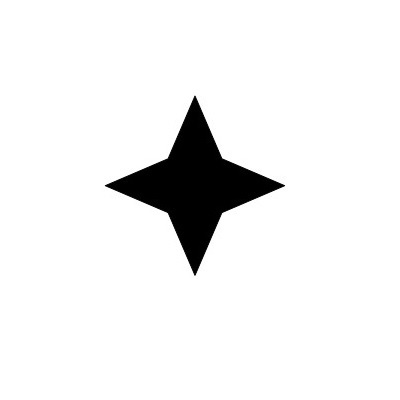

0.13081816783853514
0.15902005339788694
0.14987915682525596
0.07094034474475601


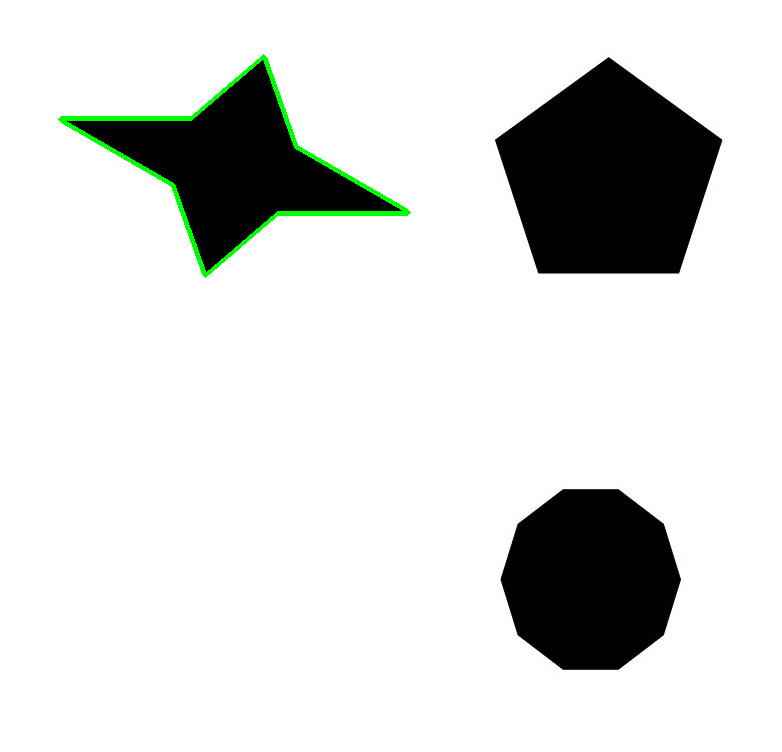

In [40]:
import cv2
import numpy as np

# Load the shape template or reference image
template = cv2.imread('/content/drive/MyDrive/DLCourse//4star.jpg',0)
cv2_imshow(template)

# Load the target image with the shapes we're trying to match
target = cv2.imread('/content/drive/MyDrive/DLCourse//shapestomatch.jpg')
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)

# Threshold both images first before using cv2.findContours
ret, thresh1 = cv2.threshold(template, 127, 255, 0)
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)

# Find contours in template
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# We need to sort the contours by area so that we can remove the largest
# contour which is the image outline
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# We extract the second largest contour which will be our template contour
template_contour = contours[1]

# Extract contours from second target image
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    # Iterate through each contour in the target image and 
    # use cv2.matchShapes to compare contour shapes
    match = cv2.matchShapes(template_contour, c, 3, 0.0)
    print(match)
    # If the match value is less than 0.15 we
    if match < 0.15:
        closest_contour = c
    else:
        closest_contour = [] 
                
cv2.drawContours(target, [closest_contour], -1, (0,255,0), 3)
cv2_imshow(target)